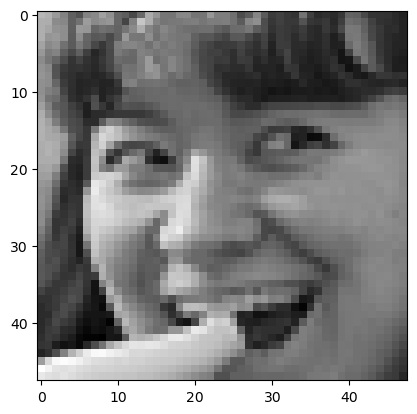

Epoch 1/15
449/449 [==============================] - 33s 71ms/step - loss: 1.7386 - accuracy: 0.2933
Epoch 2/15
449/449 [==============================] - 32s 71ms/step - loss: 1.5204 - accuracy: 0.4090
Epoch 3/15
449/449 [==============================] - 33s 74ms/step - loss: 1.4121 - accuracy: 0.4601
Epoch 4/15
449/449 [==============================] - 34s 76ms/step - loss: 1.3322 - accuracy: 0.4908
Epoch 5/15
449/449 [==============================] - 32s 72ms/step - loss: 1.2827 - accuracy: 0.5150
Epoch 6/15
449/449 [==============================] - 32s 72ms/step - loss: 1.2375 - accuracy: 0.5307
Epoch 7/15
449/449 [==============================] - 32s 70ms/step - loss: 1.1953 - accuracy: 0.5484
Epoch 8/15
449/449 [==============================] - 31s 70ms/step - loss: 1.1638 - accuracy: 0.5612
Epoch 9/15
449/449 [==============================] - 32s 71ms/step - loss: 1.1330 - accuracy: 0.5688
Epoch 10/15
449/449 [==============================] - 33s 73ms/step - loss: 1.095

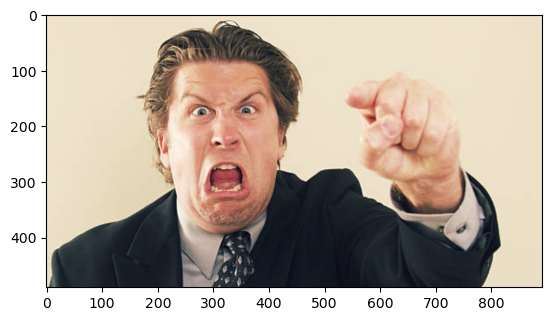

In [14]:
# Keras TensorFlow

# Case 1 - Incorrect

# dataset: https://www.kaggle.com/datasets/deadskull7/fer2013

# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CSV file
csv_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/fer2013.csv'
df = pd.read_csv(csv_path)

# Extract pixels and labels
pixels = df['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
pixels = pd.DataFrame(pixels.tolist(), dtype=float)
labels = pd.get_dummies(df['emotion']).values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(pixels.values, labels, test_size=0.2, random_state=42)

# Create ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(x_train.reshape(-1, 48, 48, 1), y_train, batch_size=64)

# Display an example image from the generator (optional)
sample_batch = next(train_generator)
plt.imshow(sample_batch[0][0, :, :, 0], cmap='gray')
plt.show()

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15)


# Function to predict emotion from an input image
def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    return predicted_emotion

# Test the function with an input image
# Replace 'path/to/your/image.jpg' with the path to your test image
input_image_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/angry.jpg'
predicted_emotion = predict_emotion(input_image_path)
print(f'Predicted emotion: {predicted_emotion}')

# Display the input image (optional)
img = image.load_img(input_image_path)
plt.imshow(img)
plt.show()

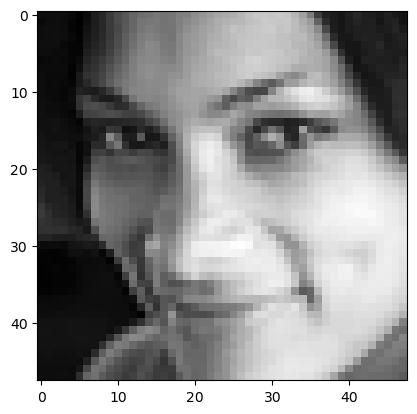

Epoch 1/15
449/449 [==============================] - 32s 69ms/step - loss: 1.7441 - accuracy: 0.2935
Epoch 2/15
449/449 [==============================] - 31s 69ms/step - loss: 1.5095 - accuracy: 0.4200
Epoch 3/15
449/449 [==============================] - 31s 68ms/step - loss: 1.4044 - accuracy: 0.4607
Epoch 4/15
449/449 [==============================] - 31s 68ms/step - loss: 1.3340 - accuracy: 0.4856
Epoch 5/15
449/449 [==============================] - 31s 69ms/step - loss: 1.2795 - accuracy: 0.5146
Epoch 6/15
449/449 [==============================] - 33s 74ms/step - loss: 1.2432 - accuracy: 0.5293
Epoch 7/15
449/449 [==============================] - 33s 73ms/step - loss: 1.2042 - accuracy: 0.5392
Epoch 8/15
449/449 [==============================] - 31s 69ms/step - loss: 1.1696 - accuracy: 0.5557
Epoch 9/15
449/449 [==============================] - 32s 71ms/step - loss: 1.1445 - accuracy: 0.5664
Epoch 10/15
449/449 [==============================] - 31s 69ms/step - loss: 1.114

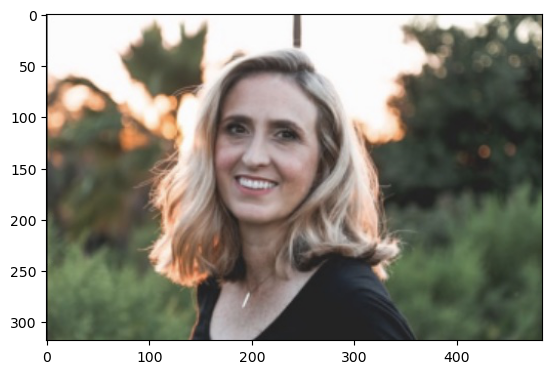

In [15]:
# Keras TensorFlow

# Case 2 - Correct

# dataset: https://www.kaggle.com/datasets/deadskull7/fer2013

# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CSV file
csv_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/fer2013.csv'
df = pd.read_csv(csv_path)

# Extract pixels and labels
pixels = df['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
pixels = pd.DataFrame(pixels.tolist(), dtype=float)
labels = pd.get_dummies(df['emotion']).values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(pixels.values, labels, test_size=0.2, random_state=42)

# Create ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(x_train.reshape(-1, 48, 48, 1), y_train, batch_size=64)

# Display an example image from the generator (optional)
sample_batch = next(train_generator)
plt.imshow(sample_batch[0][0, :, :, 0], cmap='gray')
plt.show()

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15)


# Function to predict emotion from an input image
def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    return predicted_emotion

# Test the function with an input image
# Replace 'path/to/your/image.jpg' with the path to your test image
input_image_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/happy.jpg'
predicted_emotion = predict_emotion(input_image_path)
print(f'Predicted emotion: {predicted_emotion}')

# Display the input image (optional)
img = image.load_img(input_image_path)
plt.imshow(img)
plt.show()

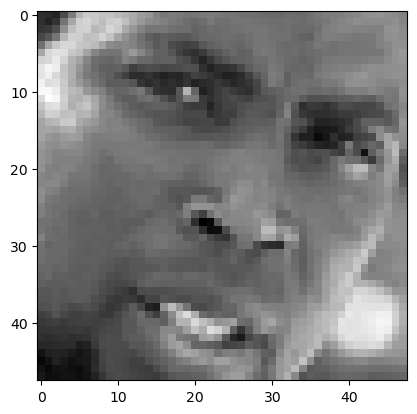

Epoch 1/15
449/449 [==============================] - 32s 69ms/step - loss: 1.7474 - accuracy: 0.2926
Epoch 2/15
449/449 [==============================] - 31s 69ms/step - loss: 1.5054 - accuracy: 0.4169
Epoch 3/15
449/449 [==============================] - 31s 69ms/step - loss: 1.3873 - accuracy: 0.4680
Epoch 4/15
449/449 [==============================] - 32s 71ms/step - loss: 1.3220 - accuracy: 0.4956
Epoch 5/15
449/449 [==============================] - 31s 70ms/step - loss: 1.2644 - accuracy: 0.5210
Epoch 6/15
449/449 [==============================] - 33s 72ms/step - loss: 1.2261 - accuracy: 0.5358
Epoch 7/15
449/449 [==============================] - 35s 79ms/step - loss: 1.1867 - accuracy: 0.5517
Epoch 8/15
449/449 [==============================] - 31s 70ms/step - loss: 1.1467 - accuracy: 0.5658
Epoch 9/15
449/449 [==============================] - 31s 70ms/step - loss: 1.1125 - accuracy: 0.5767
Epoch 10/15
449/449 [==============================] - 31s 70ms/step - loss: 1.076

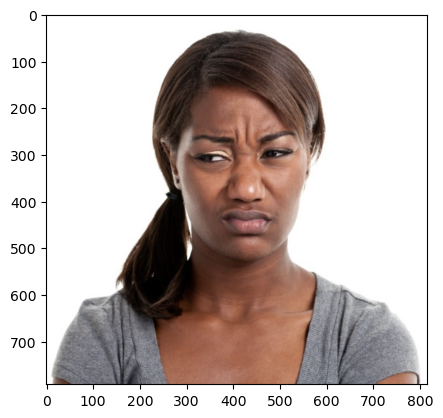

In [16]:
# Keras TensorFlow

# Case 3 - Incorrect

# dataset: https://www.kaggle.com/datasets/deadskull7/fer2013

# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CSV file
csv_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/fer2013.csv'
df = pd.read_csv(csv_path)

# Extract pixels and labels
pixels = df['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
pixels = pd.DataFrame(pixels.tolist(), dtype=float)
labels = pd.get_dummies(df['emotion']).values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(pixels.values, labels, test_size=0.2, random_state=42)

# Create ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(x_train.reshape(-1, 48, 48, 1), y_train, batch_size=64)

# Display an example image from the generator (optional)
sample_batch = next(train_generator)
plt.imshow(sample_batch[0][0, :, :, 0], cmap='gray')
plt.show()

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15)


# Function to predict emotion from an input image
def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    return predicted_emotion

# Test the function with an input image
# Replace 'path/to/your/image.jpg' with the path to your test image
input_image_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/disgust.jpg'
predicted_emotion = predict_emotion(input_image_path)
print(f'Predicted emotion: {predicted_emotion}')

# Display the input image (optional)
img = image.load_img(input_image_path)
plt.imshow(img)
plt.show()

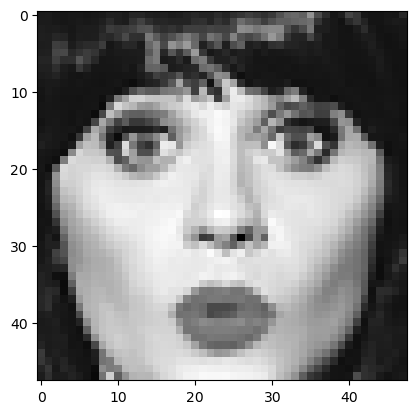

Epoch 1/15
449/449 [==============================] - 32s 69ms/step - loss: 1.7311 - accuracy: 0.2995
Epoch 2/15
449/449 [==============================] - 37s 82ms/step - loss: 1.5202 - accuracy: 0.4093
Epoch 3/15
449/449 [==============================] - 45s 100ms/step - loss: 1.4056 - accuracy: 0.4592
Epoch 4/15
449/449 [==============================] - 46s 102ms/step - loss: 1.3338 - accuracy: 0.4890
Epoch 5/15
449/449 [==============================] - 48s 106ms/step - loss: 1.2706 - accuracy: 0.5156
Epoch 6/15
449/449 [==============================] - 37s 82ms/step - loss: 1.2207 - accuracy: 0.5366
Epoch 7/15
449/449 [==============================] - 36s 80ms/step - loss: 1.1753 - accuracy: 0.5502
Epoch 8/15
449/449 [==============================] - 32s 71ms/step - loss: 1.1354 - accuracy: 0.5667
Epoch 9/15
449/449 [==============================] - 31s 70ms/step - loss: 1.1082 - accuracy: 0.5765
Epoch 10/15
449/449 [==============================] - 32s 70ms/step - loss: 1.

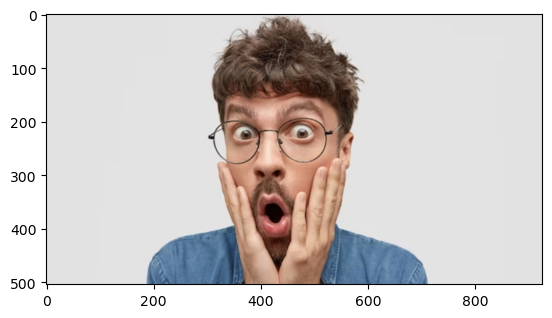

In [17]:
# Keras TensorFlow

# Case 4 - Incorrect

# dataset: https://www.kaggle.com/datasets/deadskull7/fer2013

# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CSV file
csv_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/fer2013.csv'
df = pd.read_csv(csv_path)

# Extract pixels and labels
pixels = df['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
pixels = pd.DataFrame(pixels.tolist(), dtype=float)
labels = pd.get_dummies(df['emotion']).values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(pixels.values, labels, test_size=0.2, random_state=42)

# Create ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(x_train.reshape(-1, 48, 48, 1), y_train, batch_size=64)

# Display an example image from the generator (optional)
sample_batch = next(train_generator)
plt.imshow(sample_batch[0][0, :, :, 0], cmap='gray')
plt.show()

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15)


# Function to predict emotion from an input image
def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    return predicted_emotion

# Test the function with an input image
# Replace 'path/to/your/image.jpg' with the path to your test image
input_image_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/surprised.jpg'
predicted_emotion = predict_emotion(input_image_path)
print(f'Predicted emotion: {predicted_emotion}')

# Display the input image (optional)
img = image.load_img(input_image_path)
plt.imshow(img)
plt.show()

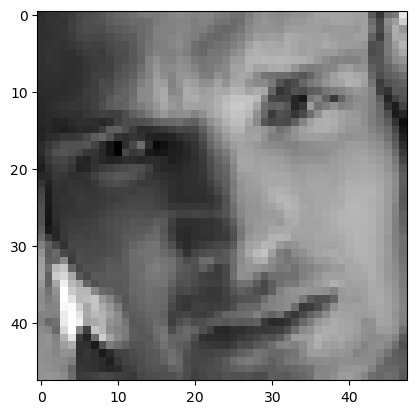

Epoch 1/15
449/449 [==============================] - 39s 85ms/step - loss: 1.7218 - accuracy: 0.3082
Epoch 2/15
449/449 [==============================] - 32s 72ms/step - loss: 1.5083 - accuracy: 0.4180
Epoch 3/15
449/449 [==============================] - 34s 75ms/step - loss: 1.3919 - accuracy: 0.4691
Epoch 4/15
449/449 [==============================] - 34s 75ms/step - loss: 1.3192 - accuracy: 0.4967
Epoch 5/15
449/449 [==============================] - 31s 69ms/step - loss: 1.2634 - accuracy: 0.5178
Epoch 6/15
449/449 [==============================] - 32s 70ms/step - loss: 1.2181 - accuracy: 0.5392
Epoch 7/15
449/449 [==============================] - 31s 70ms/step - loss: 1.1759 - accuracy: 0.5596
Epoch 8/15
449/449 [==============================] - 31s 69ms/step - loss: 1.1391 - accuracy: 0.5662
Epoch 9/15
449/449 [==============================] - 31s 69ms/step - loss: 1.1093 - accuracy: 0.5817
Epoch 10/15
449/449 [==============================] - 32s 72ms/step - loss: 1.068

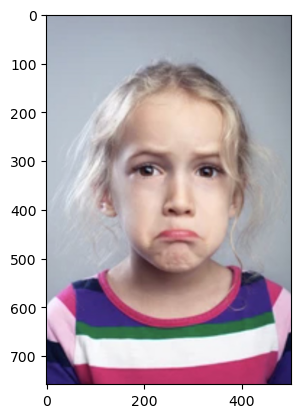

In [18]:
# Keras TensorFlow

# Case 5 - Incorrect

# dataset: https://www.kaggle.com/datasets/deadskull7/fer2013

# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CSV file
csv_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/fer2013.csv'
df = pd.read_csv(csv_path)

# Extract pixels and labels
pixels = df['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
pixels = pd.DataFrame(pixels.tolist(), dtype=float)
labels = pd.get_dummies(df['emotion']).values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(pixels.values, labels, test_size=0.2, random_state=42)

# Create ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(x_train.reshape(-1, 48, 48, 1), y_train, batch_size=64)

# Display an example image from the generator (optional)
sample_batch = next(train_generator)
plt.imshow(sample_batch[0][0, :, :, 0], cmap='gray')
plt.show()

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15)


# Function to predict emotion from an input image
def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    return predicted_emotion

# Test the function with an input image
# Replace 'path/to/your/image.jpg' with the path to your test image
input_image_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/sad.jpg'
predicted_emotion = predict_emotion(input_image_path)
print(f'Predicted emotion: {predicted_emotion}')

# Display the input image (optional)
img = image.load_img(input_image_path)
plt.imshow(img)
plt.show()

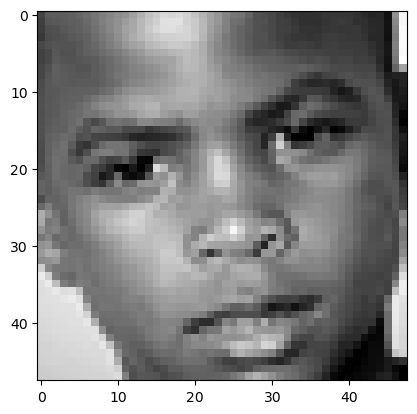

Epoch 1/15
449/449 [==============================] - 39s 86ms/step - loss: 1.7515 - accuracy: 0.2910
Epoch 2/15
449/449 [==============================] - 36s 81ms/step - loss: 1.5308 - accuracy: 0.4117
Epoch 3/15
449/449 [==============================] - 33s 72ms/step - loss: 1.4167 - accuracy: 0.4594
Epoch 4/15
449/449 [==============================] - 32s 70ms/step - loss: 1.3350 - accuracy: 0.4905
Epoch 5/15
449/449 [==============================] - 36s 79ms/step - loss: 1.2790 - accuracy: 0.5169
Epoch 6/15
449/449 [==============================] - 34s 77ms/step - loss: 1.2259 - accuracy: 0.5353
Epoch 7/15
449/449 [==============================] - 32s 71ms/step - loss: 1.1806 - accuracy: 0.5536
Epoch 8/15
449/449 [==============================] - 32s 72ms/step - loss: 1.1431 - accuracy: 0.5667
Epoch 9/15
449/449 [==============================] - 32s 71ms/step - loss: 1.1006 - accuracy: 0.5873
Epoch 10/15
449/449 [==============================] - 31s 70ms/step - loss: 1.063

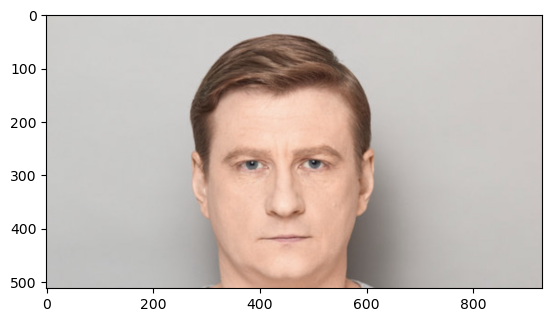

In [19]:
# Keras TensorFlow

# Case 6 - Incorrect

# dataset: https://www.kaggle.com/datasets/deadskull7/fer2013

# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CSV file
csv_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/fer2013.csv'
df = pd.read_csv(csv_path)

# Extract pixels and labels
pixels = df['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
pixels = pd.DataFrame(pixels.tolist(), dtype=float)
labels = pd.get_dummies(df['emotion']).values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(pixels.values, labels, test_size=0.2, random_state=42)

# Create ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(x_train.reshape(-1, 48, 48, 1), y_train, batch_size=64)

# Display an example image from the generator (optional)
sample_batch = next(train_generator)
plt.imshow(sample_batch[0][0, :, :, 0], cmap='gray')
plt.show()

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15)


# Function to predict emotion from an input image
def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    return predicted_emotion

# Test the function with an input image
# Replace 'path/to/your/image.jpg' with the path to your test image
input_image_path = '/Users/y/Desktop/Coding/CS330/Final Project/AI_Expression_Recognition/neutral.jpg'
predicted_emotion = predict_emotion(input_image_path)
print(f'Predicted emotion: {predicted_emotion}')

# Display the input image (optional)
img = image.load_img(input_image_path)
plt.imshow(img)
plt.show()

In [ ]:
# Conclusion - 1/6 correct, even if we try to make it more accurate this program takes one hour to process.